In [1]:
import pandas as pd
import numpy as np
!pip install geopandas
import geopandas as gpd
!pip install folium
import folium
import matplotlib.pyplot as plt
!pip install WordCloud
from wordcloud import WordCloud as wc
import seaborn as sns

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
jang = pd.read_csv('C:/k_digital/team/장애인 비율 통계.csv',encoding='euc-kr',index_col='구별')
jang.head(2)

총인구  장애인인구      장애인비율
구별                           
종로구  161869  18201  11.244278
중구   136488  17136  12.554950

In [4]:
jan=pd.read_csv('C:/k_digital/team/장애인시설정리.csv',encoding='euc-kr',index_col='구별')

In [5]:
jan.head()

주출입구  주차구역  장애인승강기  장애인화장실
구별                             
중구      1     1       3       1
성북구     1     3       0       0
강남구     3     3       0       0
강동구     1     0       0       0
용산구     3     0       0       0

In [6]:
seoul_gdf = gpd.read_file('C:/k_digital/team/LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11.shx', crs='EPSG:4326')
seoul_gdf1 = gpd.read_file('C:/k_digital/team/2019/TL_DSPSN_FCLTY_ST_2019.shx', crs='EPSG:4326')
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=10)
seoul_map1 = folium.Map(location=[37.5665, 126.9780], zoom_start=10)
folium.GeoJson(seoul_gdf).add_to(seoul_map)
folium.GeoJson(seoul_gdf1).add_to(seoul_map1)
folium.GeoJson(seoul_gdf1).add_to(seoul_map)
seoul_map

In [7]:
seoul = gpd.read_file('C:/Users/NT551_11TH/Desktop/팀플/2019/TL_DSPSN_FCLTY_ST_2019.shx')
seoul.head(2)

ID  TGRP_CODE  BD_07_NM                   ADDR_KOR       TEL_NUM  \
0  2.0        4.0  강남장애인복지관     강남구 개포로 605 (개포동12-10)   02-445-8006   
1  9.0        4.0   성모자애복지관  강남구 헌릉로 757길 35 (율현동 100)  02-3411-9581   

               HMPG_CN          TM_X          TM_Y  \
0  www.activeart.or.kr  206498.21074  543618.73207   
1  www.smwelfare.or.kr  210567.99743  541184.60907   

                        geometry  
0  POINT (206498.211 543618.732)  
1  POINT (210567.997 541184.609)

In [8]:
jan.head(5)

주출입구  주차구역  장애인승강기  장애인화장실
구별                             
중구      1     1       3       1
성북구     1     3       0       0
강남구     3     3       0       0
강동구     1     0       0       0
용산구     3     0       0       0

- 해당 데이터의 품사를 추출(명사형)

In [9]:
js=pd.read_csv('C:/k_digital/team/장애인시설합계.csv',encoding='euc-kr',index_col='구별')

In [10]:
js.head(2)

주출입구  주차구역  장애인승강기  장애인화장실
구별                             
강남구  1163   937     477     288
강동구   416   601     182     134

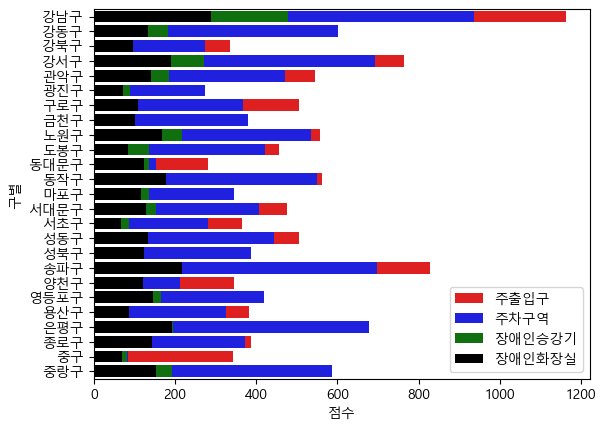

In [11]:
sns.barplot(y=js.index,x='주출입구',data=js,label="주출입구",orient='h',color='red')
sns.barplot(y=js.index,x='주차구역',data=js,label="주차구역",orient='h',color='blue')
sns.barplot(y=js.index,x='장애인승강기',data=js,label="장애인승강기",orient='h',color='green')
sns.barplot(y=js.index,x='장애인화장실',data=js,label="장애인화장실",orient='h',color='black')
plt.legend()
plt.xlabel('점수')
plt.ylabel('구별')
plt.show()

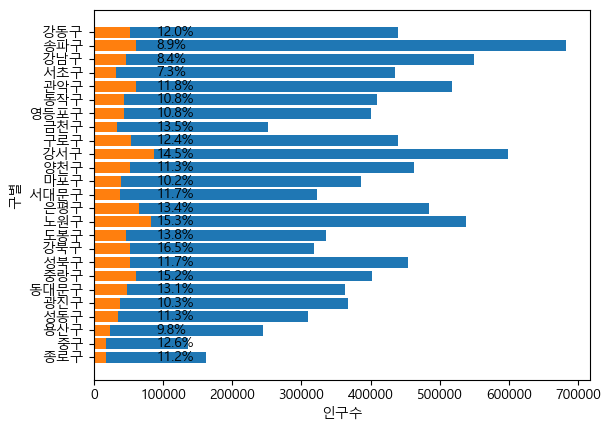

In [12]:
ax = plt.barh(jang.index,jang.총인구,label="총인구")
ax = plt.barh(jang.index,jang.장애인인구,label="장애인인구")
for i, v in enumerate(round(jang['장애인비율'],1)):
    plt.text(v+90000, i, f"{str(v)}%", va='center')
plt.xlabel('인구수')
plt.ylabel('구별')
plt.show()

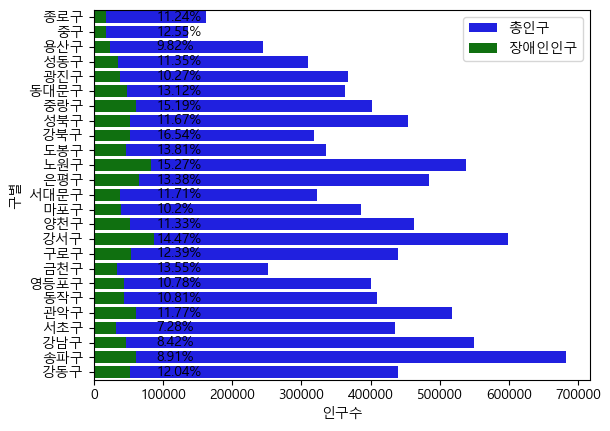

In [13]:
data = {
    '구별': jang.index,
    '총인구': jang['총인구'],
    '장애인인구': jang['장애인인구'],
    '장애인비율': jang['장애인비율']
}
# Seaborn을 사용하여 막대 그래프 그리기
ax = sns.barplot(x='총인구', y='구별', data=data, label='총인구', color='b')
sns.barplot(x='장애인인구', y='구별', data=data, label='장애인인구', color='g')

# 각 막대 위에 값을 표시
for i, v in enumerate(round(data['장애인비율'],2)):
    ax.annotate(f"{str(v)}%", (v + 90000, i), va='center')
plt.xlabel('인구수')
plt.ylabel('구별')
plt.legend()
plt.show()

In [14]:
seoul.head(5)

ID  TGRP_CODE    BD_07_NM                             ADDR_KOR  \
0   2.0        4.0    강남장애인복지관               강남구 개포로 605 (개포동12-10)   
1   9.0        4.0     성모자애복지관            강남구 헌릉로 757길 35 (율현동 100)   
2  10.0        8.0  성모자애제1주간보호           강남구 헌릉로757길 35 (율현동 110번지)   
3  11.0        8.0  성모자애제2주간보호           강남구 헌릉로757길 35 (율현동 110번지)   
4  12.0        8.0    역삼주간보호센터  강남구 테헤란로8길 36 (역삼동 827-61) 강남문화원 2층   

        TEL_NUM                                    HMPG_CN          TM_X  \
0   02-445-8006                        www.activeart.or.kr  206498.21074   
1  02-3411-9581                        www.smwelfare.or.kr  210567.99743   
2  02-3411-9581                 http://www.smwelfare.or.kr  210567.99743   
3  02-3411-9581                 http://www.smwelfare.or.kr  210567.99743   
4   02-518-2270  http://hnwelfare.or.kr/main/sub04_03.html  202821.32529   

           TM_Y                       geometry  
0  543618.73207  POINT (206498.211 543618.732)  
1  541184.60907  POINT (210567.997 541184.609)  
2  541184.60907  POINT (210567.997 541184.609)  
3  541184.60907  POINT (210567.997 541184.609)  
4  544115.30951  POINT (202821.325 544115.310)

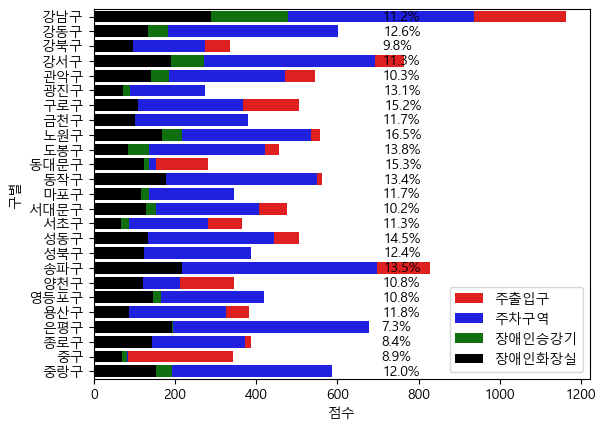

In [15]:
ax=sns.barplot(y=js.index,x='주출입구',data=js,label="주출입구",orient='h',color='red')
ax=sns.barplot(y=js.index,x='주차구역',data=js,label="주차구역",orient='h',color='blue')
ax=sns.barplot(y=js.index,x='장애인승강기',data=js,label="장애인승강기",orient='h',color='green')
ax=sns.barplot(y=js.index,x='장애인화장실',data=js,label="장애인화장실",orient='h',color='black')


for i, v in enumerate(round(jang['장애인비율'],1)):
    plt.text(v+700, i, f"{str(v)}%", va='center')
plt.legend()
plt.xlabel('점수')
plt.ylabel('구별')
plt.show()



In [16]:
for i in range(len(seoul)):
    seoul.ADDR_KOR = seoul.ADDR_KOR.iloc[:][i][:3]

In [17]:
seoul.head(8)

ID  TGRP_CODE    BD_07_NM ADDR_KOR       TEL_NUM  \
0   2.0        4.0    강남장애인복지관      강남구   02-445-8006   
1   9.0        4.0     성모자애복지관      강남구  02-3411-9581   
2  10.0        8.0  성모자애제1주간보호      강남구  02-3411-9581   
3  11.0        8.0  성모자애제2주간보호      강남구  02-3411-9581   
4  12.0        8.0    역삼주간보호센터      강남구   02-518-2270   
5  14.0        4.0        청음회관      강남구   02-556-4758   
6  16.0        4.0       충현복지관      강남구  02-2192-0600   
7  17.0        8.0          하상      강남구   02-451-6000   

                                     HMPG_CN          TM_X          TM_Y  \
0                        www.activeart.or.kr  206498.21074  543618.73207   
1                        www.smwelfare.or.kr  210567.99743  541184.60907   
2                 http://www.smwelfare.or.kr  210567.99743  541184.60907   
3                 http://www.smwelfare.or.kr  210567.99743  541184.60907   
4  http://hnwelfare.or.kr/main/sub04_03.html  202821.32529  544115.30951   
5                         www.chungeum.or.kr  203746.91728  545549.14474   
6                       http://www.chw.or.kr  203255.17113  544904.75571   
7                      http://www.hasang.org  206637.76267  543674.92745   

                        geometry  
0  POINT (206498.211 543618.732)  
1  POINT (210567.997 541184.609)  
2  POINT (210567.997 541184.609)  
3  POINT (210567.997 541184.609)  
4  POINT (202821.325 544115.310)  
5  POINT (203746.917 545549.145)  
6  POINT (203255.171 544904.756)  
7  POINT (206637.763 543674.927)

In [18]:
seoul.ADDR_KOR.unique()

array(['강남구'], dtype=object)

In [20]:
tour = pd.read_excel('C:/k_digital/team/장애인관광지.xls',index_col='구별')

In [21]:
tour.head()

콘텐츠명   서브카테고리명
구별                          
중랑구      중랑캠핑숲 매표소       매표소
송파구    올림픽공원 안내서비스     안내서비스
송파구  올림픽공원 장애인용화장실  장애인용 화장실
송파구  올림픽공원 장애인용화장실  장애인용 화장실
송파구  올림픽공원 장애인용화장실  장애인용 화장실

In [22]:
tour['서브카테고리명'].unique()

array(['매표소', '안내서비스', '장애인용 화장실', '휠체어 대여', '장애인용 승강기', '장애인 주차구역',
       '출입구 단차제거', '접근로', nan, '시각장애인 편의', '청각장애인 편의', '보행장애물'],
      dtype=object)

In [23]:
tour_plt = tour.groupby('서브카테고리명').count()

In [24]:
tour_plt.head()

콘텐츠명
서브카테고리명       
매표소         55
보행장애물       71
시각장애인 편의    33
안내서비스       76
장애인 주차구역   107

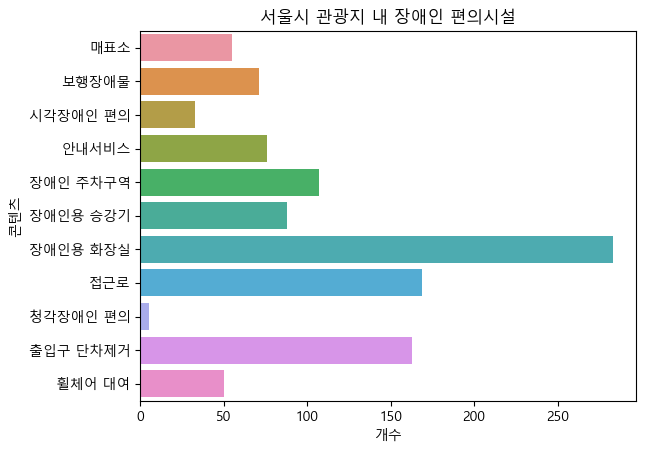

In [25]:
sns.barplot(data=tour_plt,y=tour_plt.index,x=tour_plt['콘텐츠명'])
plt.xlabel('개수')
plt.ylabel('콘텐츠')
plt.title('서울시 관광지 내 장애인 편의시설')
plt.show()

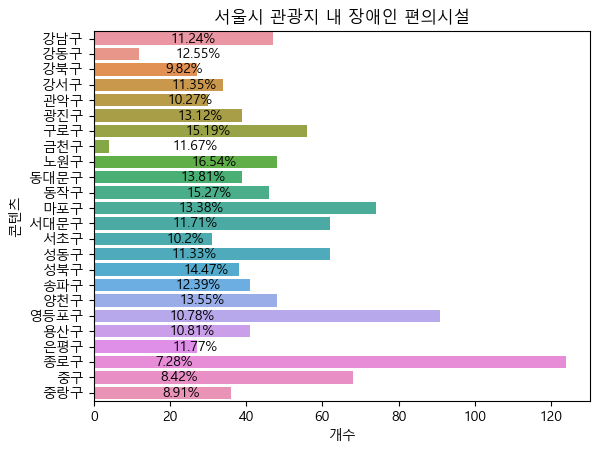

In [26]:
tour_gu = tour.groupby('구별').count()
ap = sns.barplot(data=tour_gu, y = tour_gu.index, x = tour_gu['콘텐츠명'])
plt.xlabel('개수')
plt.ylabel('콘텐츠')
plt.title('서울시 관광지 내 장애인 편의시설')

for i, v in enumerate(round(data['장애인비율'],2)):
    ap.annotate(f"{str(v)}%", (v + 9, i), va='center')
plt.show()

In [27]:
c = jan.groupby('구별')['주출입구'].count()
c

구별
강남구     403
강동구     264
강북구     154
강서구     409
관악구     227
광진구     123
구로구     189
금천구     214
노원구     302
도봉구     233
동대문구    143
동작구     201
마포구     172
서대문구    199
서초구     139
성동구     186
성북구     198
송파구     295
양천구     179
영등포구    205
용산구     137
은평구     276
종로구     192
중구      127
중랑구     225
Name: 주출입구, dtype: int64

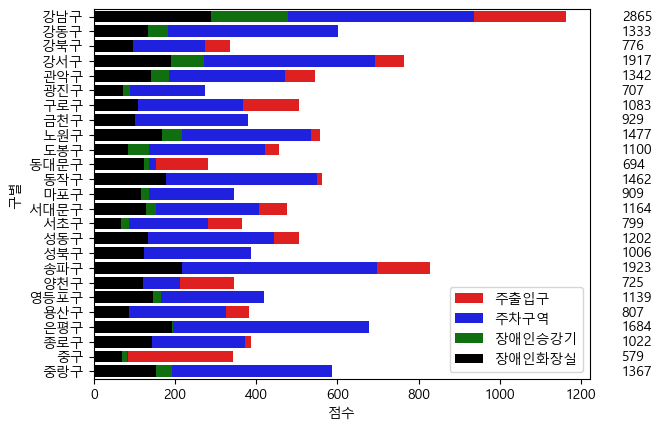

In [49]:
ax=sns.barplot(y=js.index,x='주출입구',data=js,label="주출입구",orient='h',color='red')
ax=sns.barplot(y=js.index,x='주차구역',data=js,label="주차구역",orient='h',color='blue')
ax=sns.barplot(y=js.index,x='장애인승강기',data=js,label="장애인승강기",orient='h',color='green')
ax=sns.barplot(y=js.index,x='장애인화장실',data=js,label="장애인화장실",orient='h',color='black')
for i, v in enumerate(js['합계']):
    plt.text(1300, i, v, va='center')
    
plt.legend()
plt.xlabel('점수')
plt.ylabel('구별')
plt.show()



In [31]:
js['합계']=js.sum(axis=1)
js

주출입구  주차구역  장애인승강기  장애인화장실    합계
구별                                    
강남구   1163   937     477     288  2865
강동구    416   601     182     134  1333
강북구    335   273      72      96   776
강서구    764   692     272     189  1917
관악구    544   472     185     141  1342
광진구    273   273      90      71   707
구로구    506   367     100     110  1083
금천구    378   379      71     101   929
노원구    557   536     217     167  1477
도봉구    456   422     137      85  1100
동대문구   281   154     136     123   694
동작구    563   550     172     177  1462
마포구    311   346     135     117   909
서대문구   475   407     153     129  1164
서초구    365   281      87      66   799
성동구    506   444     119     133  1202
성북구    376   387     119     124  1006
송파구    828   698     181     216  1923
양천구    346   213      45     121   725
영등포구   410   418     166     145  1139
용산구    381   325      14      87   807
은평구    619   678     195     192  1684
종로구    388   373     117     144  1022
중구     343    85      81      70   579
중랑구    436   586     192     153  1367

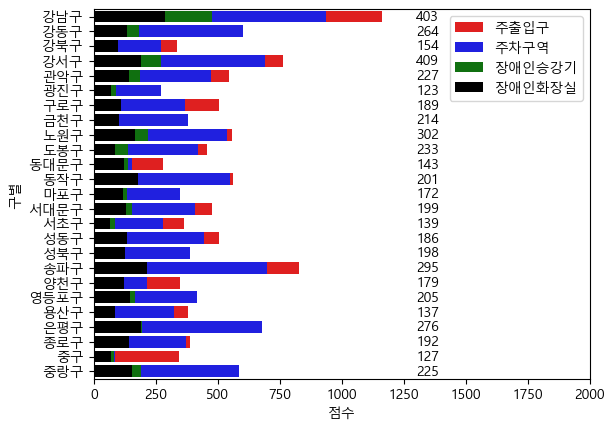

In [51]:
ax=sns.barplot(y=js.index,x='주출입구',data=js,label="주출입구",orient='h',color='red')
ax=sns.barplot(y=js.index,x='주차구역',data=js,label="주차구역",orient='h',color='blue')
ax=sns.barplot(y=js.index,x='장애인승강기',data=js,label="장애인승강기",orient='h',color='green')
ax=sns.barplot(y=js.index,x='장애인화장실',data=js,label="장애인화장실",orient='h',color='black')
plt.xlim(0,2000)

    
for i, v in enumerate(c):
    plt.text(1300, i, v, va='center')
plt.legend()
plt.xlabel('점수')
plt.ylabel('구별')
plt.show()



In [46]:
js.head()

주출입구  주차구역  장애인승강기  장애인화장실    합계
구별                                   
강남구  1163   937     477     288  2865
강동구   416   601     182     134  1333
강북구   335   273      72      96   776
강서구   764   692     272     189  1917
관악구   544   472     185     141  1342

In [54]:
jan.groupby('구별').count()

주출입구  주차구역  장애인승강기  장애인화장실
구별                              
강남구    403   403     403     403
강동구    264   264     264     264
강북구    154   154     154     154
강서구    409   409     409     409
관악구    227   227     227     227
광진구    123   123     123     123
구로구    189   189     189     189
금천구    214   214     214     214
노원구    302   302     302     302
도봉구    233   233     233     233
동대문구   143   143     143     143
동작구    201   201     201     201
마포구    172   172     172     172
서대문구   199   199     199     199
서초구    139   139     139     139
성동구    186   186     186     186
성북구    198   198     198     198
송파구    295   295     295     295
양천구    179   179     179     179
영등포구   205   205     205     205
용산구    137   137     137     137
은평구    276   276     276     276
종로구    192   192     192     192
중구     127   127     127     127
중랑구    225   225     225     225

In [78]:
# 파일 읽기
k = pd.read_csv('C:/k_digital/team/장애인편의구역.csv',encoding='euc-kr',index_col='구별')
# 파일 확인
k.head(3)
# 불필요한 컬럼 '동' 제거
k.drop('동별',inplace=True,axis=1)
# 주출입구,주차구역,장애인승강기, 장애인 화장실 점수 매기기 (이용가능:3, 이용불편:1, 해당없음:0)
replace_dict = {
    '이용가능': 3,
    '이용불편': 1,
    '해당없음': 0
}
# 대체 매핑을 적용
k['주출입구'] = k['주출입구'].replace(replace_dict)
k['주차구역'] = k['주차구역'].replace(replace_dict)
k['장애인승강기'] = k['장애인승강기'].replace(replace_dict)
k['장애인화장실'] = k['장애인화장실'].replace(replace_dict)

In [82]:
k.head(2)

주출입구  주차구역  장애인승강기  장애인화장실
구별                             
중구      1     1       3       1
성북구     1     3       0       0

In [107]:
k

주출입구  주차구역  장애인승강기  장애인화장실
구별                             
중구      1     1       3       1
성북구     1     3       0       0
강남구     3     3       0       0
강동구     1     0       0       0
용산구     3     0       0       0
..    ...   ...     ...     ...
송파구     1     0       0       0
금천구     3     0       0       0
동작구     3     0       0       0
동작구     3     0       0       0
금천구     3     0       0       0

[5392 rows x 4 columns]

In [102]:
# 파일 읽기
df = pd.read_excel('C:/k_digital/team/장애인관광지.xls',index_col='구별')
# 그래프를 위해서 그룹함수 사용
df_sub = df.groupby('서브카테고리명').count()
df_gu = tour.groupby('구별').count()


In [106]:
df_sub.head(5)

콘텐츠명
서브카테고리명       
매표소         55
보행장애물       71
시각장애인 편의    33
안내서비스       76
장애인 주차구역   107

In [109]:
df = pd.read_excel('C:/Users/NT551_11TH/Desktop/팀플/B226. 서울시 15년 장애인관광지 위치도/B226. 서울시 15년 장애인관광지 위치도/2. 파일데이터/장애인관광지.xls')

In [110]:
df

콘텐츠 ID\n(필수 입력) 사용유무\n(필수입력)                             콘텐츠명\n(필수 입력)  \
0       SM0120190108            Y                                 중랑캠핑숲 매표소   
1       SM0120460111            Y                               올림픽공원 안내서비스   
2     SM012046012305            Y                             올림픽공원 장애인용화장실   
3     SM012046012105            Y                             올림픽공원 장애인용화장실   
4     SM012046011005            Y                             올림픽공원 장애인용화장실   
...              ...          ...                                       ...   
1165    SM0120040505            Y                  월드컵공원(평화의공원) 잔디광장 장애인화장실   
1166    SM0120040605            Y                 월드컵공원(평화의공원) 모험놀이터 장애인화장실   
1167    SM0120040705            Y               월드컵공원(평화의공원) 월드컵기념광장 장애인화장실   
1168    SM0120040803            Y  월드컵공원(평화의공원) 난지도이야기+서부공원녹지사업소 주출입구높이차이제거   
1169    SM0120040805            Y      월드컵공원(평화의공원) 난지도이야기_서부공원녹지사업소 장애인화장실   

     서브카테고리 명\n(선택 입력) 주소[구]\n(조건부 선택 입력) 구주소[동]\n(조건부 선택 입력)  \
0                  매표소                중랑구                 망우동   
1                안내서비스                송파구                 방이동   
2             장애인용 화장실                송파구                 방이동   
3             장애인용 화장실                송파구                 방이동   
4             장애인용 화장실                송파구                 방이동   
...                ...                ...                 ...   
1165          장애인용 화장실                마포구                 상암동   
1166          장애인용 화장실                마포구                 성산동   
1167          장애인용 화장실                마포구                 성산동   
1168          출입구 단차제거                마포구                 성산동   
1169          장애인용 화장실                마포구                 성산동   

      구주소[산]\n(선택 입력) 구주소[번지1]\n(조건부 선택 입력)  구주소[번지2]\n(선택 입력)  \
0                 NaN                    79                NaN   
1                 NaN                   NaN                NaN   
2                 NaN                   NaN                NaN   
3                 NaN                   NaN                NaN   
4                 NaN                   NaN                NaN   
...               ...                   ...                ...   
1165              NaN                  1536                NaN   
1166              NaN                   NaN                NaN   
1167              NaN                   NaN                NaN   
1168              NaN                   NaN                NaN   
1169              NaN                   NaN                NaN   

     새주소[도로명 주소]\n(조건부 선택 입력)  ...  상세 제목16\n(선택 입력)  상세 내용16\n(선택 입력)  \
0                  망우로87길 110  ...               NaN               NaN   
1                  가마산로 331-4  ...               NaN               NaN   
2                  가마산로 331-4  ...               NaN               NaN   
3                  가마산로 331-4  ...               NaN               NaN   
4                         NaN  ...               NaN               NaN   
...                       ...  ...               ...               ...   
1165                      NaN  ...               NaN               NaN   
1166                      NaN  ...               NaN               NaN   
1167              월드컵로 243-48  ...               NaN               NaN   
1168              월드컵로 243-60  ...               NaN               NaN   
1169              월드컵로 243-60  ...               NaN               NaN   

      상세 제목17\n(선택 입력)  상세 내용17\n(선택 입력) 상세 제목18\n(선택 입력) 상세 내용18\n(선택 입력)  \
0                  NaN               NaN              NaN              NaN   
1                  NaN               NaN              NaN              NaN   
2                  NaN               NaN              NaN              NaN   
3                  NaN               NaN              NaN              NaN   
4                  NaN               NaN              NaN              NaN   
...                ...               ...              ...              ...   
1165               NaN               NaN       